## Notebooks Import and Packages

In [40]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

from sympy import symbols, diff
from math import log

%matplotlib inline

# Example 1 - Simple cost function

$f(x) = x^2 + x + 1$

In [41]:
def f(x):
    return x**2 + x + 1

In [42]:
# Data
x_1 = np.linspace(start=-3, stop=3, num=100)

<function matplotlib.pyplot.show(close=None, block=None)>

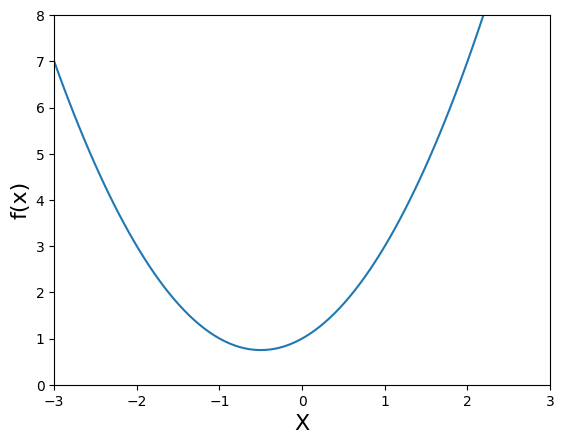

In [43]:
# Plot
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show

## Slope & Derivatives

In [ ]:
def df(x):
    return 2*x + 1

In [ ]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)

plt.xlim([-3,3])
plt.ylim([0,8])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim([-2,3])
plt.ylim([-3,6])

plt.title('Slope of the cost function', fontsize=17)
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_1,df(x_1), color='skyblue', linewidth=5)

plt.show

## Gradient Descent

In [ ]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

while True:
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    step_size = abs(new_x - previous_x)
    if step_size < precision:
        break

print(f"Local minimum occurs at: {new_x}")
print(f"Slope or df(x) value at this point is: {df(new_x)}")
print(f"f(x) value or cost at this point is: {f(new_x)}")

In [ ]:
# Superimpose the gradient descent calculations in plot

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)

plt.xlim([-3,3])
plt.ylim([0,8])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.5)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.7)

# 2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim([-2,3])
plt.ylim([-3,6])

plt.title('Slope of the cost function', fontsize=17)
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_1,df(x_1), color='skyblue', linewidth=5, alpha=0.5)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.7)

plt.show

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [ ]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

In [ ]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim([0.5,5.5])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim([-2,2])
plt.ylim([-6,8])

plt.title('Slope of the cost function', fontsize=17)
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2,dg(x_2), color='skyblue', linewidth=5)

plt.show

## Gradient Descent as a Python Function

In [ ]:
def gradient_descent(derivative_func, initial_guess, multiplier, precision, 
                     max_iter=300):
    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        step_size = abs(new_x - previous_x)
        if step_size < precision:
            break
    
    return new_x, x_list, slope_list

In [ ]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess=0.5, 
                                                 multiplier=0.02, 
                                                 precision=0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

In [ ]:
# Calling gradient descent function

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess=0.1, 
                                                 multiplier=0.02, 
                                                 precision=0.001)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim([0.5,5.5])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.7)

# 2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim([-2,2])
plt.ylim([-6,8])

plt.title('Slope of the cost function', fontsize=17)
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2,dg(x_2), color='skyblue', linewidth=5)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.7)

plt.show

# Example 3 - Divergence

## $$h(x) = x^5 - 2x^4 + 2$$

In [ ]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

In [ ]:
# Calling gradient descent function

local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, 
                                                 initial_guess=-0.2, 
                                                 multiplier=0.02, 
                                                 precision=0.001,
                                                 max_iter=70)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)

plt.xlim([-1.2,2.5])
plt.ylim([-1,4])

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.7)

# 2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim([-1,2])
plt.ylim([-4,5])

plt.title('Slope of the cost function', fontsize=17)
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)

plt.plot(x_3,dh(x_3), color='skyblue', linewidth=5)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.7)

plt.show

print("Local min occurs at: ", local_min)
print("Cost at this minimum is: ", h(local_min))
print("Number of steps: ", len(list_x))

# The Learning Rate

In [ ]:
n = 100
low_gamma = gradient_descent(derivative_func=dg, 
                                                 initial_guess=3, 
                                                 multiplier=0.0005, 
                                                 precision=0.0001,
                                                 max_iter=n)
mid_gamma = gradient_descent(derivative_func=dg, 
                                                 initial_guess=3, 
                                                 multiplier=0.001, 
                                                 precision=0.0001,
                                                 max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, 
                                                 initial_guess=3, 
                                                 multiplier=0.002, 
                                                 precision=0.0001,
                                                 max_iter=n)

# Plotting reduction in cost for each iteration

plt.figure(figsize=[20,10])

# 1 Chart: Cost function

plt.xlim([0,n])
plt.ylim([0,50])

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('No of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y Axis Data: convert the list to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='green', linewidth=3)
plt.scatter(iteration_list, g(low_values), color='green', s=100, alpha=0.7)

# Plotting mid learning rate
plt.plot(iteration_list, g(mid_values), color='steelblue', linewidth=3)
plt.scatter(iteration_list, g(mid_values), color='steelblue', s=100, alpha=0.7)

# Plotting high learning rate
plt.plot(iteration_list, g(high_values), color='hotpink', linewidth=3)
plt.scatter(iteration_list, g(high_values), color='hotpink', s=100, alpha=0.7)

plt.show()

# Example 4 - Data Visualization with 3D Charts

## Minimise $$f(x,y) = \frac{1}{3^{-x^2-y^2} + 1}$$

In [ ]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r+1)

In [ ]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

# Transform to two-dimensional arrays
x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

In [ ]:
# Generating 3D Plot
fig = plt.figure(figsize = [16, 12])
ax = fig.add_subplot(projection='3d') # Get current axis

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.5)

plt.show()

## Partial Derivatives & Symbolic Computation

In [ ]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a,b))
print('Partial derivative with respect to x is: ', diff(f(a,b), a))
print('Value of f(x,y) at x=1.8 and y=1.0 is: ', f(a,b).evalf(subs={a:1.8,b:1.0})) # Cost at these values
print('Value of partial derivative with respecto to x: ',diff(f(a,b), a).evalf(subs={a:1.8, b:1.0}))

## Batch Gradient Descent with Sympy

In [ ]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # Initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at x value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

In [ ]:
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r/(r+1)**2
def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r/(r+1)**2

In [ ]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # Initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at x value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))